# **Modeling Bitcoin Volatility with ARCH and GARCH Models**  

## **Project Overview**  
This project applies **ARCH (Autoregressive Conditional Heteroskedasticity)** and **GARCH (Generalized ARCH)** models to analyze and forecast **Bitcoin price volatility**. Using **daily Bitcoin price data from September 13, 2015, to present**, the study aims to capture volatility clustering and time-varying variance in cryptocurrency markets.  

By leveraging **econometric time series models**, this analysis provides **insights into Bitcoin's risk dynamics**, offering valuable information for traders, investors, and risk analysts.  

---  

## **Dataset Overview**  
- **Source:** Kaggle (Historical Bitcoin Price Data)  
- **Time Frame:** September 13, 2015 – Present (2,193 daily observations)  
- **Key Variables:**  
  - `Open`, `High`, `Low`, `Close`, `Adjusted Close`, `Volume` (floating-point values)  
  - **Log Returns** → Computed as the logarithmic difference of consecutive **Adjusted Close** prices.  
- **Preprocessing Steps:**  
  ✔️ Removed missing values to ensure consistency.  
  ✔️ Created **Log Returns** for volatility analysis.  

---  

## **Data Preprocessing**  
To ensure accuracy in volatility modeling, the following preprocessing steps were applied:  
✔️ **Log Returns Calculation**: Transformed closing prices into log returns to better capture volatility patterns.  
✔️ **Stationarity Check**: Conducted **Augmented Dickey-Fuller (ADF) test** to assess stationarity in log returns.  
✔️ **Autocorrelation Analysis**: Used **ACF and PACF plots** to investigate volatility clustering and dependencies.  

---  

## **ARCH (Autoregressive Conditional Heteroskedasticity) Model**  

### **Why ARCH?**  
The **ARCH model** is essential for capturing **time-varying volatility** in financial time series. It models the conditional variance as a function of past squared residuals, making it particularly useful in periods of **high and low market fluctuations**.  

### **Usefulness (Pros)**  
- **Captures Volatility Clustering**: Identifies periods of heightened market risk.  
- **Improves Forecasting Accuracy**: Models **time-dependent variance**, useful for risk assessment.  
- **Flexible Framework**: Can be extended into **GARCH** models for better performance.  

### **Limitations (Cons)**  
- **High Data Requirement**: Requires **large datasets** for accurate estimation.  
- **Computationally Intensive**: Model fitting can be resource-heavy.  
- **Assumes Normally Distributed Residuals**: Financial data often exhibit **heavy tails**.  

### **ARCH Forecasting and Results**  
- **ARCH(1) Model:** Captured volatility clustering with significant coefficients.  
- **Mean Return:** \( \mu = 0.2563, p = 0.002 \) (statistically significant).  
- **Volatility Estimates:** Omega (\( 13.7464, p = 0.001 \)), \( \alpha_1 = 0.1394, p = 0.004 \).  
- **AIC Score:** 12181.9 (Model selection criteria).  

---  

## **GARCH (Generalized ARCH) Model**  

### **Why GARCH?**  
The **GARCH model** extends ARCH by incorporating **past variances**, making it more robust for financial time series exhibiting **persistent volatility clustering**.  

### **Usefulness (Pros)**  
- **Better Long-Term Volatility Modeling**: Includes **lagged conditional variances** for improved forecasting.  
- **Higher Forecast Accuracy**: Provides **more precise estimates** of future risk.  
- **Versatile Extensions**: Can be extended to **EGARCH or GJR-GARCH** to model asymmetric volatility.  

### **Limitations (Cons)**  
- **Parameter Selection Complexity**: Requires fine-tuning for best performance.  
- **Sensitive to Data Assumptions**: Assumes normal distribution of residuals.  
- **Higher Computational Cost**: More resource-intensive than ARCH.  

### **GARCH Forecasting and Results**  
- **GARCH(1,1) Model:** Confirmed persistent volatility clustering.  
- **Mean Return:** \( 25.1960 \) (significant).  
- **Volatility Estimates:** Omega (\( 6246.1132 \)), \( \alpha_1 = 0.1461 \), \( \beta_1 = 0.8348 \).  
- **AIC Score:** 11,852.0 (lower AIC indicates better model fit).  

---  

## **Key Takeaways**  
✔️ **ARCH models** help capture short-term volatility clustering but lack persistence.  
✔️ **GARCH models** extend ARCH by modeling **long-term variance dependencies**.  
✔️ **Both models provide valuable insights** into Bitcoin's **risk and volatility structure**.  
✔️ **Choosing the right model depends on the persistence of volatility and dataset properties**.  


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch
import scipy.stats as stats
import warnings

In [4]:
# --- Set Working Directory ---
os.chdir('/Users/latifayari/Desktop')

# --- Load and Inspect Data ---
data = pd.read_csv('/Users/latifayari/Desktop/DataProjects/PredictiveEnalytics/BTC-USD.csv', parse_dates=['Date'], index_col='Date')
print(data.head())
print(data.shape)
print(data.dtypes)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-09-13  235.242004  235.934998  229.332001  230.511993  230.511993   
2015-09-14  230.608994  232.440002  227.960999  230.643997  230.643997   
2015-09-15  230.492004  259.182007  229.822006  230.304001  230.304001   
2015-09-16  230.250000  231.214996  227.401993  229.091003  229.091003   
2015-09-17  229.076004  230.285004  228.925995  229.809998  229.809998   

                Volume  
Date                    
2015-09-13  18478800.0  
2015-09-14  20997800.0  
2015-09-15  19177800.0  
2015-09-16  20144200.0  
2015-09-17  18935400.0  
(2193, 6)
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


In [5]:
#Volatility Modeling (Returns)
import numpy as np

In [6]:
# Compute log returns
data['Log_Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [7]:
# Drop rows with NaN values
data = data.dropna()

In [8]:
# Check the dataset
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-09-14  230.608994  232.440002  227.960999  230.643997  230.643997   
2015-09-15  230.492004  259.182007  229.822006  230.304001  230.304001   
2015-09-16  230.250000  231.214996  227.401993  229.091003  229.091003   
2015-09-17  229.076004  230.285004  228.925995  229.809998  229.809998   
2015-09-18  233.520996  234.352997  232.184998  232.975006  232.975006   

                Volume  Log_Returns  
Date                                 
2015-09-14  20997800.0     0.000572  
2015-09-15  19177800.0    -0.001475  
2015-09-16  20144200.0    -0.005281  
2015-09-17  18935400.0     0.003134  
2015-09-18  20242200.0     0.013678  


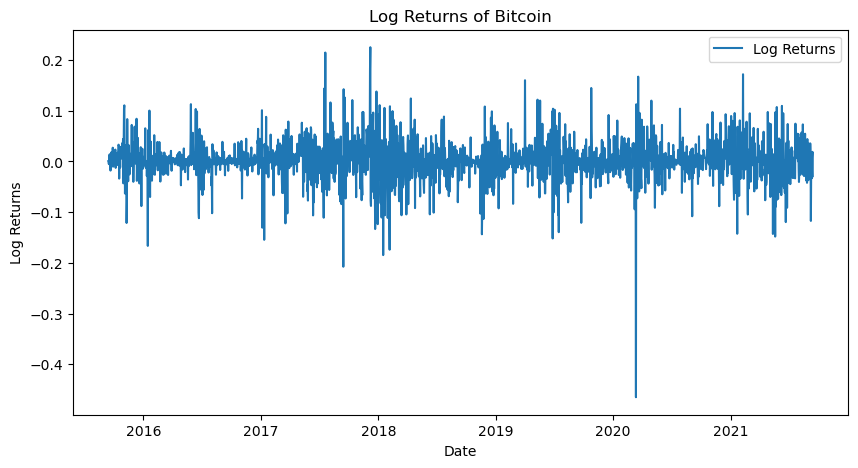

In [9]:
## --- Plot Log Returns to Visualize Volatility ----
plt.figure(figsize=(10, 5))
plt.plot(data['Log_Returns'], label='Log Returns')
plt.title('Log Returns of Bitcoin')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

In [10]:
# --- ADF Test for Stationarity ---
result = adfuller(data['Log_Returns'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -48.099305433044194
p-value: 0.0
Critical Values: {'1%': -3.4333477117905487, '5%': -2.8628642889373044, '10%': -2.5674749845110627}


In [11]:
# Interpret the result
if result[1] <= 0.05:
    print("Log returns are stationary.")
else:
    print("Log returns are not stationary. Consider further differencing or transformation.")

Log returns are stationary.


In [13]:
# --- Plot ACF and PACF ---
log_returns = data['Log_Returns']

<Figure size 800x400 with 0 Axes>

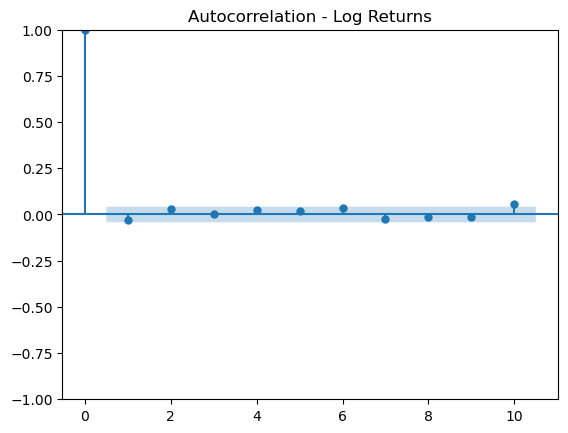

In [14]:
# Plot ACF for Log Returns
plt.figure(figsize=(8, 4))
plot_acf(log_returns, lags=10, title="Autocorrelation - Log Returns")
plt.show()

<Figure size 800x400 with 0 Axes>

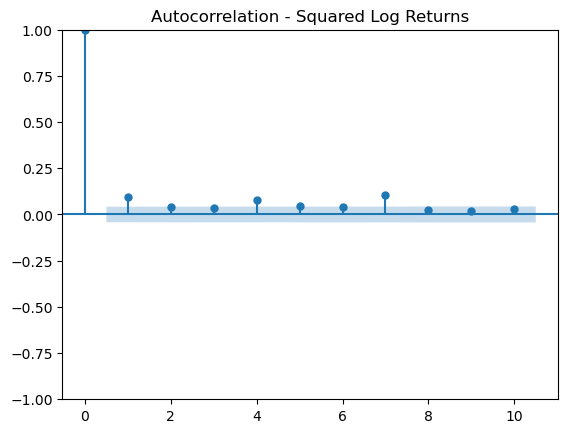

In [15]:
# Plot ACF for Squared Log Returns
plt.figure(figsize=(8, 4))
plot_acf(log_returns**2, lags=10, title="Autocorrelation - Squared Log Returns")
plt.show()

<Figure size 800x400 with 0 Axes>

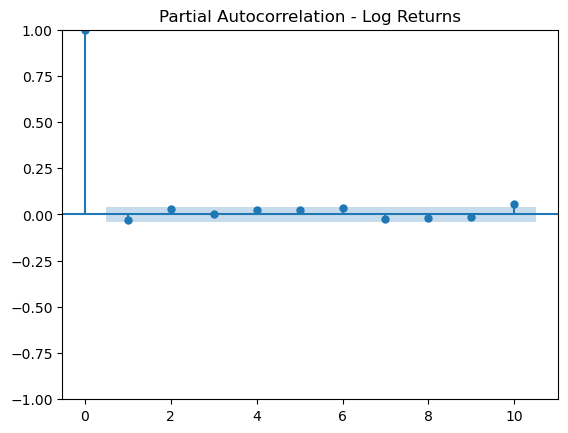

In [16]:
# Plot PACF for Log Returns
plt.figure(figsize=(8, 4))
plot_pacf(log_returns, lags=10, title="Partial Autocorrelation - Log Returns", method='ywm')
plt.show()

<Figure size 800x400 with 0 Axes>

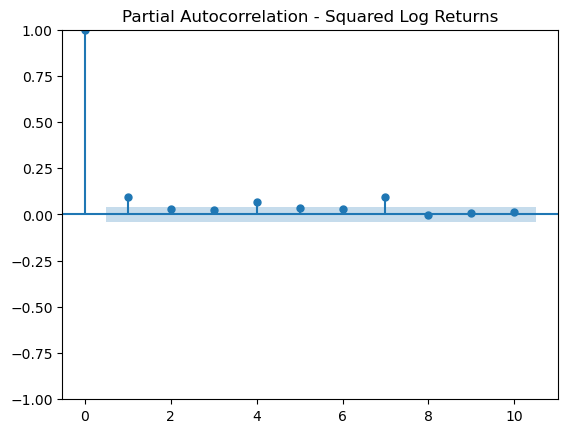

In [17]:
# Plot PACF for Squared Log Returns
plt.figure(figsize=(8, 4))
plot_pacf(log_returns**2, lags=10, title="Partial Autocorrelation - Squared Log Returns", method='ywm')
plt.show()

In [19]:
# Define log returns
log_returns = data['Log_Returns'] * 100  # Scale by 100 for better interpretability

In [20]:
# Test different combinations of p and q
for p in range(1, 3):  # Test p = 1 to 2
    for q in range(0, 3):  # Test q = 0 to 2
        print(f"Testing ARCH({p}), GARCH({q}) model")
        model = arch_model(log_returns, vol='Garch', p=p, q=q)
        res = model.fit(disp='off')
        print(res.summary())
        print("-" * 80)

Testing ARCH(1), GARCH(0) model
                      Constant Mean - ARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -6087.95
Distribution:                  Normal   AIC:                           12181.9
Method:            Maximum Likelihood   BIC:                           12199.0
                                        No. Observations:                 2185
Date:                Tue, Mar 11 2025   Df Residuals:                     2184
Time:                        15:18:29   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2563  8.280e-02

In [21]:
# Define the dependent variable
dep_var = data['Log_Returns']

In [22]:
# Fit the ARCH model (p=1, q=0)
am = arch_model(100 * dep_var, p=1, q=0)
res = am.fit(update_freq=5)


Iteration:      5,   Func. Count:     29,   Neg. LLF: 6129.809606937055
Iteration:     10,   Func. Count:     50,   Neg. LLF: 6087.95294987805
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6087.952921192408
            Iterations: 12
            Function evaluations: 57
            Gradient evaluations: 12


In [23]:
# Print the model summary
print(res.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -6087.95
Distribution:                  Normal   AIC:                           12181.9
Method:            Maximum Likelihood   BIC:                           12199.0
                                        No. Observations:                 2185
Date:                Tue, Mar 11 2025   Df Residuals:                     2184
Time:                        15:19:11   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2563  8.280e-02      3.095  1.965e-03 [9.403e-0

In [ ]:
# Set up the figure with 2 subplots (1 column and 2 rows)
plt.figure(figsize=(12, 10))

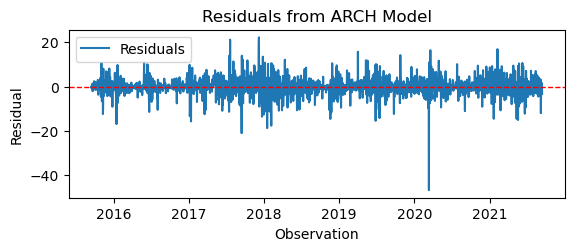

In [26]:
# Plot the residuals
plt.subplot(2, 1, 1)
resid = res.resid
plt.plot(resid, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals from ARCH Model')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.legend()

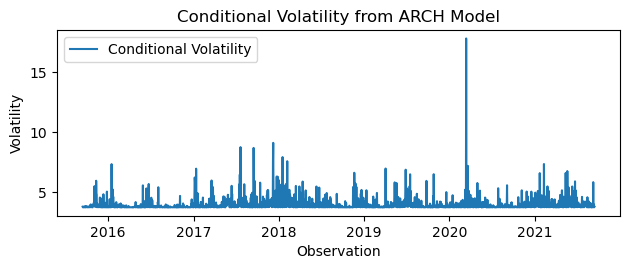

In [32]:
# Plot the conditional volatility
plt.subplot(2, 1, 2)
cond_vol = res.conditional_volatility
plt.plot(cond_vol, label='Conditional Volatility')
plt.title('Conditional Volatility from ARCH Model')
plt.xlabel('Observation')
plt.ylabel('Volatility')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

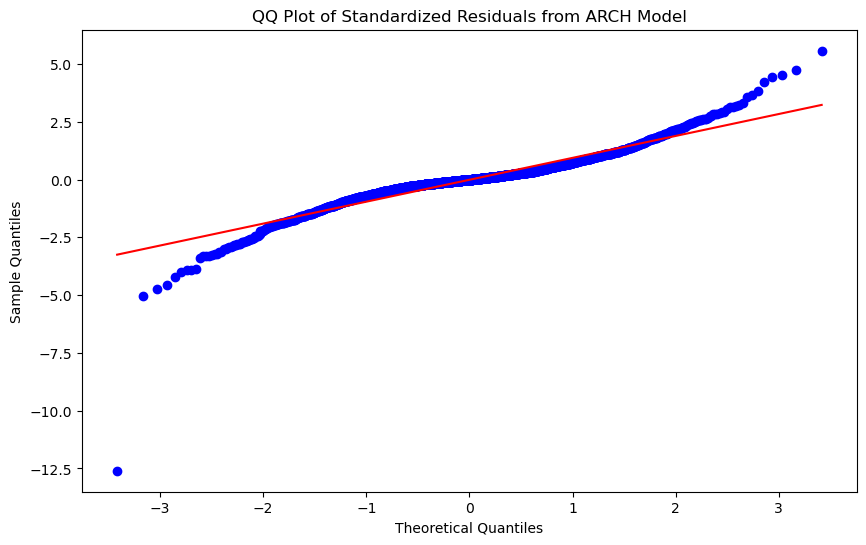

In [33]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Get standardized residuals correctly
standardized_resid = res.std_resid  # Use .std_resid instead of .standardized_resid

# Plot the QQ plot
plt.figure(figsize=(10, 6))
stats.probplot(standardized_resid, dist="norm", plot=plt)
plt.title('QQ Plot of Standardized Residuals from ARCH Model')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [34]:
import numpy as np
from statsmodels.stats.diagnostic import het_arch
import pandas as pd

e_atst = data['Log_Returns']

In [ ]:
# Perform Engle's ARCH test on the original data
etest = het_arch(e_atst, maxlag=5)
print('pval Lagrange: ' + str(np.round(etest[1], 4)))
print('pval F-test: ' + str(np.round(etest[1], 4)))

# Calculate standardized residuals from ARCH model
standardized_residuals = res.resid / res.conditional_volatility

standardized_resid = res.conditional_volatility

standardized_resid = res.std_resid

In [37]:
# Perform Engle's ARCH test on the standardized residuals
etest_std = het_arch(standardized_residuals, maxlag=5)
print('pval Lagrange for standardized residuals: ' + str(np.round(etest_std[1], 4)))
print('pval F-test for standardized residuals: ' + str(np.round(etest_std[1], 4)))

# Perform the Engle ARCH test on the log-returns data to check for ARCH effects.
# A significant p-value (0.0132) indicates the presence of ARCH effects,
# confirming that the variance is not constant and varies over time.
# This justifies the use of ARCH or GARCH models for modeling the volatility in the data.
# The test result suggests that volatility clustering is present, a common feature in financial time series.

pval Lagrange for standardized residuals: 0.0132
pval F-test for standardized residuals: 0.0132


/var/folders/mq/jgwj9sy11kj90_fg49zd7m840000gn/T/ipykernel_55435/3886600952.py:2: FutureWarning: the 'maxlag' keyword is deprecated, use 'nlags' instead.
  etest_std = het_arch(standardized_residuals, maxlag=5)


Forecasted Variances:
h.01    15.140252
h.02    15.856657
h.03    15.956510
h.04    15.970428
h.05    15.972367
h.06    15.972638
h.07    15.972675
h.08    15.972681
h.09    15.972681
h.10    15.972682
Name: 2021-09-13 00:00:00, dtype: float64

Forecasted Conditional Volatility:
h.01    3.891048
h.02    3.982042
h.03    3.994560
h.04    3.996302
h.05    3.996544
h.06    3.996578
h.07    3.996583
h.08    3.996584
h.09    3.996584
h.10    3.996584
Name: 2021-09-13 00:00:00, dtype: float64


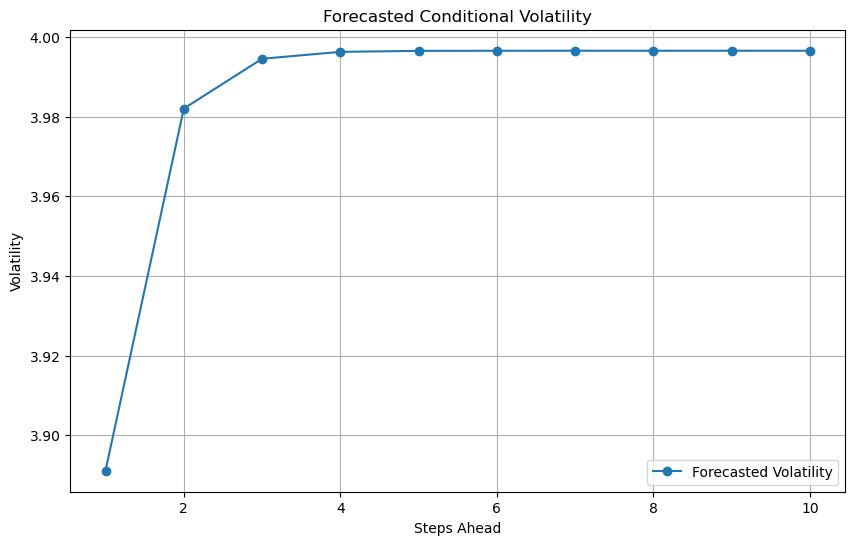

In [38]:
# Generate forecasts
forecast_horizon = 10  # Define how many steps ahead you want to forecast
forecast = res.forecast(horizon=forecast_horizon, reindex=False)

# Extract the forecasted variances
variance_forecast = forecast.variance.iloc[-1, :]  # Get the last row (most recent forecast)

# Convert variance to conditional volatility
conditional_volatility_forecast = np.sqrt(variance_forecast)

# Print forecasted variances and volatilities
print("Forecasted Variances:")
print(variance_forecast)
print("\nForecasted Conditional Volatility:")
print(conditional_volatility_forecast)

# Plot forecasted conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(range(1, forecast_horizon + 1), conditional_volatility_forecast, marker='o', label='Forecasted Volatility')
plt.title("Forecasted Conditional Volatility")
plt.xlabel("Steps Ahead")
plt.ylabel("Volatility")
plt.legend()
plt.grid()
plt.show()

In [39]:
# --- GARCH MOdel ---

import matplotlib.pyplot as plt
from arch import arch_model

In [40]:
# Fit a GARCH(1, 1) model to the log-returns data, scaling by 100 for percentage returns.
gm = arch_model(100 * e_atst, p=1, q=1)

In [41]:
# Fit the model and print the summary of results.
res = gm.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     38,   Neg. LLF: 5957.168653089694
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5922.002888188222
            Iterations: 8
            Function evaluations: 54
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5922.00
Distribution:                  Normal   AIC:                           11852.0
Method:            Maximum Likelihood   BIC:                           11874.8
                                        No. Observations:                 2185
Date:                Tue, Mar 11 2025   Df Residuals:                     2184
Time:                        15:36:07   Df Model:                            1
          

In [ ]:
# Set up the figure with 2 subplots (1 column and 2 rows)
plt.figure(figsize=(14, 10))

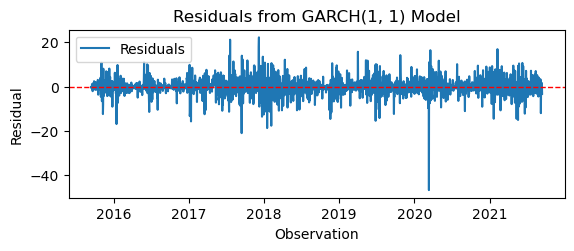

In [43]:
# Plot the residuals
plt.subplot(2, 1, 1)
resid = res.resid
plt.plot(resid, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals from GARCH(1, 1) Model')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.legend()


# 3. ARCH and GARCH Models

## 3.1 Dataset Description

The dataset contains historical data on Bitcoin (BTC) prices in USD, sourced from Kaggle, and includes 2,193 daily observations. It features six main columns: Open, High, Low, Close, Adjusted Close, and Volume, all represented as floating-point numbers. The data is indexed by date, starting from September 13, 2015, giving a comprehensive look at Bitcoin's price movements over time.

To better analyze price changes, a new column, **Log_Returns**, was calculated, which shows the logarithmic difference between consecutive adjusted closing prices. This transformation helps to capture the daily fluctuations in Bitcoin's value. Any missing data points were removed to ensure the analysis remains accurate and reliable.

### Analyzing Bitcoin Volatility: Log Returns Visualization and Stationarity Check

Analyzing Bitcoin log returns involves plotting them to observe volatility over time and checking for stationarity using the **Augmented Dickey-Fuller (ADF) test**. The plot visually highlights fluctuations, while the ADF test provides statistical confirmation. If the p-value from the test is below 0.05, the log returns are stationary; otherwise, further differencing or transformation is suggested for stationarity.

### Analyzing Autocorrelation and Partial Autocorrelation for Bitcoin Log Returns

- The **Autocorrelation Function (ACF)** chart helps visualize how past log returns are correlated over different time lags.
- The **Partial Autocorrelation Function (PACF)** isolates the effect of previous lags to show direct relationships.
- Additionally, looking at the **ACF and PACF of squared log returns** helps identify signs of volatility clustering, which is crucial for understanding and modeling periods of high market fluctuation.



## 3.2 ARCH (Autoregressive Conditional Heteroskedasticity) Model

The **ARCH model** is widely used for analyzing financial data with volatility clustering—high and low variability periods. It was applied to Bitcoin log returns to model and forecast market volatility, helping to identify and predict periods of turbulence.

### Why ARCH?

ARCH models are essential for analyzing financial data that exhibits changing volatility over time. They forecast not just the level of the series but its variance, making them valuable for risk management, options pricing, and other financial applications. The model's ability to adapt to volatility clustering is a significant advantage when dealing with market data.

### Usefulness (Pros)
- **Captures Volatility Clustering:** Identifies periods of high and low volatility.
- **Improves Forecasting Accuracy:** Models time-varying volatility for better financial time series forecasts.
- **Flexibility:** Can be extended to **GARCH (Generalized ARCH)** models for additional flexibility.

### Limitations (Cons)
- **Model Selection Complexity:** Requires careful analysis and trial and error to determine the optimal lag structure.
- **Computational Intensity:** Fitting ARCH models, especially with higher orders, can be demanding.
- **Data Requirement:** Needs a substantial amount of data to estimate parameters accurately.

### ARCH Model Formulation

\[ \sigma^2_t = \alpha_0 + \sum_{i=1}^{p} \alpha_i \epsilon^2_{t-i} \]

Where:
- \( \sigma^2_t \) is the conditional variance at time \( t \).
- \( \alpha_0 > 0 \) is the constant term.
- \( \alpha_i \) measures the impact of past squared error terms on current variance.
- \( \epsilon_{t-1} \) is the residual error term.

### Forecasting and Results

The **ARCH regression analysis** provided a constant mean model for Bitcoin's log returns and an **ARCH(1) volatility model** to capture time-varying volatility.

- **Mean Return:** \( \mu = 0.2563, p = 0.002 \) (statistically significant)
- **Intercept (\omega):** \( 13.7464, p = 0.001 \)
- **Lagged Squared Residual (\alpha_1):** \( 0.1394, p = 0.004 \)
- **Log-Likelihood:** \( -6087.95 \)
- **AIC:** \( 12181.9 \)

These results confirm the presence of conditional heteroskedasticity in the log returns, supporting the use of the ARCH model.



## 3.3 GARCH (Generalized Autoregressive Conditional Heteroskedasticity) Model

The **GARCH model** extends ARCH by incorporating **lagged conditional variances**, providing a more flexible and robust framework for modeling volatility clustering.

### Why GARCH?

GARCH models account for time-varying volatility more comprehensively than ARCH models by including past conditional variances. They are widely used in risk management, asset pricing, and financial forecasting.

### Usefulness (Pros)
- **Enhanced Volatility Modeling:** Captures long-term volatility trends better than ARCH.
- **Increased Forecast Accuracy:** Provides more precise forecasts for financial series.
- **Versatility:** Can be extended to **EGARCH** for asymmetric volatility modeling.

### Limitations (Cons)
- **Complex Parameter Estimation:** Requires significant computational effort.
- **High Data Dependency:** Needs large datasets for effective estimation.
- **Assumptions Sensitivity:** Assumes normality in residuals, which may not always hold.

### GARCH Model Formulation

\[ \sigma^2_t = \alpha_0 + \sum_{i=1}^{p} \alpha_i \epsilon^2_{t-i} + \sum_{j=1}^{q} \beta_j \sigma^2_{t-j} \]

Where:
- \( \sigma^2_t \) is the conditional variance at time \( t \).
- \( \alpha_0 > 0 \) is the constant term.
- \( \alpha_i \) measures past squared residuals' impact on variance.
- \( \beta_j \) captures past variances' influence on the current variance.

### Forecasting and Results

- **R-Squared:** \( 0.000 \) (Mean model has no explanatory power)
- **Log-Likelihood:** \( -5922 \)
- **AIC:** \( 11,852.0 \)
- **BIC:** \( 11,874.8 \)
- **Omega:** \( 6246.1132 \)
- **\alpha_1:** \( 0.1461 \)
- **\beta_1:** \( 0.8348 \)

These parameters confirm strong volatility persistence, validating the GARCH model's effectiveness in capturing Bitcoin's market fluctuations.
